In [1]:
import pandas as pd

my_table = pd.read_csv("bestsellers with categories.csv")

print(my_table.head())
print(f"кол-во столбцов :  {my_table.shape[1]}")
print(f"кол-во строк:  {my_table.shape[0]}")

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  
кол-во столбцов :  7
кол-во строк:  550


О скольки книгах хранит данные датасет? Ответ: 549

In [2]:
my_table.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
print(my_table)

                                                  name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)   
546  You Are a Badass: How to Stop Doubting Your Gr...   
547  You Are a Badass: How to Stop Doubting Your Gr...   
548  You Are a Badass: How to Stop Doubting Your Gr...   
549  You Are a Badass: How to Stop Doubting Your Gr...   

                       author  user_rating  reviews  price  year        genre  
0                    JJ Smith          4.7    17350      8  2016  Non Fiction  
1                Stephen King          4.6     2052     22  2011      Fiction  
2          Jordan B. Peterson          4.7    18979     15  201

In [3]:
spaces = my_table.isnull().sum()
print(spaces)

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


Есть ли в каких либо переменных пропуски? Ответ: Нет


In [4]:
unique_gen = my_table['genre'].unique()
print(unique_gen)

['Non Fiction' 'Fiction']


Какие есть уникальные жанры? Ответ: Non Fiction, Fiction

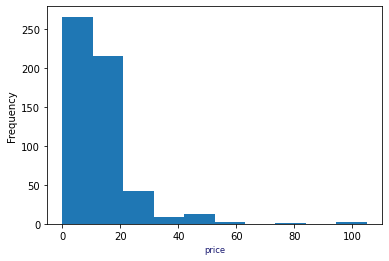

In [5]:
import matplotlib.pyplot as plt
my_table["price"].plot(kind="hist")
plt.xlabel("price", fontsize="small", color="midnightblue")
plt.show()

In [6]:
price = my_table["price"].agg(['max', 'min', 'mean', 'median'])

print(price)

max       105.0
min         0.0
mean       13.1
median     11.0
Name: price, dtype: float64


Mаксимальная цена? Ответ: 105
Минимальная цена? Ответ: 0
Средняя цена? Ответ: 13.1
Медианная цена? Ответ: 11

In [7]:
my_table["user_rating"].agg(['max'])

max    4.9
Name: user_rating, dtype: float64

Какой рейтинг в датасете наивысший? Ответ: 4.9

In [8]:
my_table.loc[my_table['user_rating'] == 4.9].count()

name           52
author         52
user_rating    52
reviews        52
price          52
year           52
genre          52
dtype: int64

Сколько книг имеют такой рейтинг? Ответ:52

In [9]:
max_reviews = my_table["reviews"].agg(['max'])
print(max_reviews)
my_table.loc[my_table['reviews'] == 87841]

max    87841
Name: reviews, dtype: int64


,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


У какой книги больше всего отзывов? Ответ: Where the Crawdads Sing	Delia Owens

In [10]:
books_2015 = my_table.loc[my_table['year'] == 2015]
print(books_2015)
books_2015["price"].agg(['max'])
books_2015.loc[books_2015['price'] == 46]


                                                  name  \
16   Adult Coloring Book: Stress Relieving Animal D...   
17      Adult Coloring Book: Stress Relieving Patterns   
18   Adult Coloring Books: A Coloring Book for Adul...   
21                         All the Light We Cannot See   
23   American Sniper: The Autobiography of the Most...   
28                        Baby Touch and Feel: Animals   
29            Balance (Angie's Extreme Stress Menders)   
34   Being Mortal: Medicine and What Matters in the...   
35                            Between the World and Me   
54   Creative Haven Creative Cats Coloring Book (Ad...   
55   Creative Haven Owls Coloring Book (Adult Color...   
63                      Dear Zoo: A Lift-the-Flap Book   
89   Dover Creative Haven Art Nouveau Animal Design...   
99   Enchanted Forest: An Inky Quest and Coloring b...   
111                                    First 100 Words   
123                               Giraffes Can't Dance   
132           

,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction


Из тех книг, что попали в Топ-50 в 2015 году, какая книга самая дорогая? Ответ: Publication Manual of the American Psychologic

In [11]:
my_table.loc[(my_table['year'] == 2010) & (my_table['genre'] == 'Fiction')].count()

name           20
author         20
user_rating    20
reviews        20
price          20
year           20
genre          20
dtype: int64

Сколько книг жанра Fiction попали в Топ-50 в 2010 году (используйте &)? Ответ: 20

In [12]:
my_year = my_table.loc[(my_table['year'] == 2010) | (my_table['year'] == 2011)]
my_rating = my_year.loc[my_year['user_rating'] == 4.9]
print(my_rating.count())


name           1
author         1
user_rating    1
reviews        1
price          1
year           1
genre          1
dtype: int64


Сколько книг c рейтингом 4.9 попало в рейтинг в 2010 и 2011 годах? Ответ: 1

И напоследок, давайте отсортируем по возрастанию цены все книги, которые попали в рейтинг в 2015 году и стоят дешевле 8 долларов (используйте функцию sort_values).

In [13]:
year_2015 = my_table.loc[(my_table['year'] == 2010)]
price_8 = year_2015.loc[(my_table['price'] < 8)]
price_8.sort_values(by=['price'])

,name,author,user_rating,reviews,price,year,genre
461,The Short Second Life of Bree Tanner: An Eclip...,Stephenie Meyer,4.6,2122,0,2010,Fiction
11,A Patriot's History of the United States: From...,Larry Schweikart,4.6,460,2,2010,Non Fiction
264,Percy Jackson and the Olympians Paperback Boxe...,Rick Riordan,4.8,548,2,2010,Fiction
389,The Girl with the Dragon Tattoo (Millennium Se...,Stieg Larsson,4.4,10559,2,2010,Fiction
370,The Five Dysfunctions of a Team: A Leadership ...,Patrick Lencioni,4.6,3207,6,2010,Non Fiction
403,The Help,Kathryn Stockett,4.8,13871,6,2010,Fiction
419,The Last Olympian (Percy Jackson and the Olymp...,Rick Riordan,4.8,4628,7,2010,Fiction


Какая книга последняя в отсортированном списке? Ответ: The Last Olympian (Percy Jackson and the Olymp...	

Для начала давайте посмотрим на максимальную и минимальную цены для каждого из жанров (используйте функции groupby и agg, для подсчета минимальных и максимальных значений используйте max и min).

In [14]:
max_price = my_table[['price', 'genre']].groupby(['genre']).agg(['max', 'min'])
print(max_price)

            price    
              max min
genre                
Fiction        82   0
Non Fiction   105   0


Максимальная цена для жанра Fiction? Ответ: 82

Минимальная цена для жанра Fiction? Ответ: 0

Максимальная цена для жанра Non Fiction? Ответ: 105

Минимальная цена для жанра Non Fiction? Ответ:0

Теперь создайте новый датафрейм, который будет вмещать в себя количество книг для каждого из авторов (используйте функции groupby и agg, для подсчета количества используйте count).

In [32]:
my_df = my_table[['author', 'name']]
df_size = my_df.groupby(['author']).size().reset_index(name='qnt')
print(f"кол-во столбцов :  {df_size.shape[1]}")
print(f"кол-во строк:  {df_size.shape[0]}")
df_size.agg(['max'])
df_size.loc[df_size['qnt'] == 12]

                         author  qnt
0              Abraham Verghese    2
1                Adam Gasiewski    1
2                 Adam Mansbach    1
3                     Adir Levy    1
4    Admiral William H. McRaven    1
..                          ...  ...
243             Walter Isaacson    3
244               William Davis    2
245            William P. Young    2
246            Wizards RPG Team    3
247                Zhi Gang Sha    2

[248 rows x 2 columns]
кол-во столбцов :  2
кол-во строк:  248


,author,qnt
120,Jeff Kinney,12


Какой размерности вышла таблица? Ответ: 2, 248
У какого автора больше всего книг? Ответ: Jeff Kinney
Сколько книг у этого автора? Ответ: 12

Теперь создайте второй датафрейм, который будет вмещать средний рейтинг для каждого автора (используйте функции groupby и agg, для подсчета среднего значения используйте mean).

In [35]:
avg_rating = my_table[['author', 'user_rating']].groupby(['author']).mean().reset_index()
avg_rating.agg(['min'])
avg_rating.loc[avg_rating['user_rating'] == 3.9]

,author,user_rating
71,Donna Tartt,3.9


У какого автора средний рейтинг минимальный? Ответ: Donna Tartt
Какой у этого автора средний рейтинг? Ответ: 3.9

Соедините последние два датафрейма так, чтобы для каждого автора было видно количество книг и средний рейтинг (Используйте функцию concat с параметром axis=1). Сохраните результат в переменную

In [40]:
df_qnt_rating = pd.concat([df_size, avg_rating['user_rating']], axis=1)
print(df_qnt_rating)

                         author  qnt  user_rating
0              Abraham Verghese    2     4.600000
1                Adam Gasiewski    1     4.400000
2                 Adam Mansbach    1     4.800000
3                     Adir Levy    1     4.800000
4    Admiral William H. McRaven    1     4.700000
..                          ...  ...          ...
243             Walter Isaacson    3     4.566667
244               William Davis    2     4.400000
245            William P. Young    2     4.600000
246            Wizards RPG Team    3     4.800000
247                Zhi Gang Sha    2     4.600000

[248 rows x 3 columns]


In [43]:
df_qnt_rating.sort_values(by=['qnt', 'user_rating'])

,author,qnt,user_rating
171,Muriel Barbery,1,4.000000
43,Chris Cleave,1,4.100000
109,Ian K. Smith M.D.,1,4.100000
186,Pierre Dukan,1,4.100000
81,Elizabeth Strout,1,4.200000
...,...,...,...
11,American Psychological Association,10,4.500000
226,Suzanne Collins,11,4.663636
92,Gary Chapman,11,4.736364
197,Rick Riordan,11,4.772727


Какой автор первый в списке? Ответ: Muriel Barbery